# The Indentor Benchmark

**Romain Beucher** romain.beucher (at) anu.edu.au

In [14]:
from underworld import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

In [15]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-0.5, 0.), 
                  maxCoord=(0.5, 1.0),
                  gravity=(0., 0.))

In [16]:
Model.outputDir = "outputs"

In [17]:
Model.minViscosity = 1e-3
Model.maxViscosity = 1e3

In [18]:
Material = Model.add_material(name="Material", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))

In [19]:
Material.viscosity = 1e1
Material.density = 0.01
Material.plasticity = GEO.VonMises(cohesion=1.0)

In [20]:
cond1 = (Model.mesh.data[Model.top_wall.data][:, 0] < 0.0625)
cond2 = (Model.mesh.data[Model.top_wall.data][:, 0] > -0.0625)

indices = Model.top_wall.data[cond1 * cond2]

IndexSet = GEO.uw.mesh.FeMesh_IndexSet(Model.mesh, topologicalIndex=0, size=Model.mesh.nodesGlobal, fromObject=indices)

In [21]:
Model.set_velocityBCs(left=[0.0, None], right=[0.0, None], bottom=[0.0, 0.0], nodeSets=[(IndexSet, [None, -1.0])])

In [22]:
Model.init_model(pressure="lithostatic")

In [23]:
GEO.rcParams["initial.nonlinear.min.iterations"] = 3
GEO.rcParams["initial.nonlinear.max.iterations"] = 3
GEO.rcParams["initial.nonlinear.tolerance"] = 1e-9
GEO.rcParams["nonlinear.tolerance"] = 1e-9
GEO.rcParams["surface.pressure.normalization"] = False

In [24]:
Model.run_for(nstep=1)

Running with UWGeodynamics version 0.9.8b-dev-29e4c3b(development)
Step:     1 Model Time: 0.01 year dt: 0.01 year (2018-11-29 20:49:56)


1


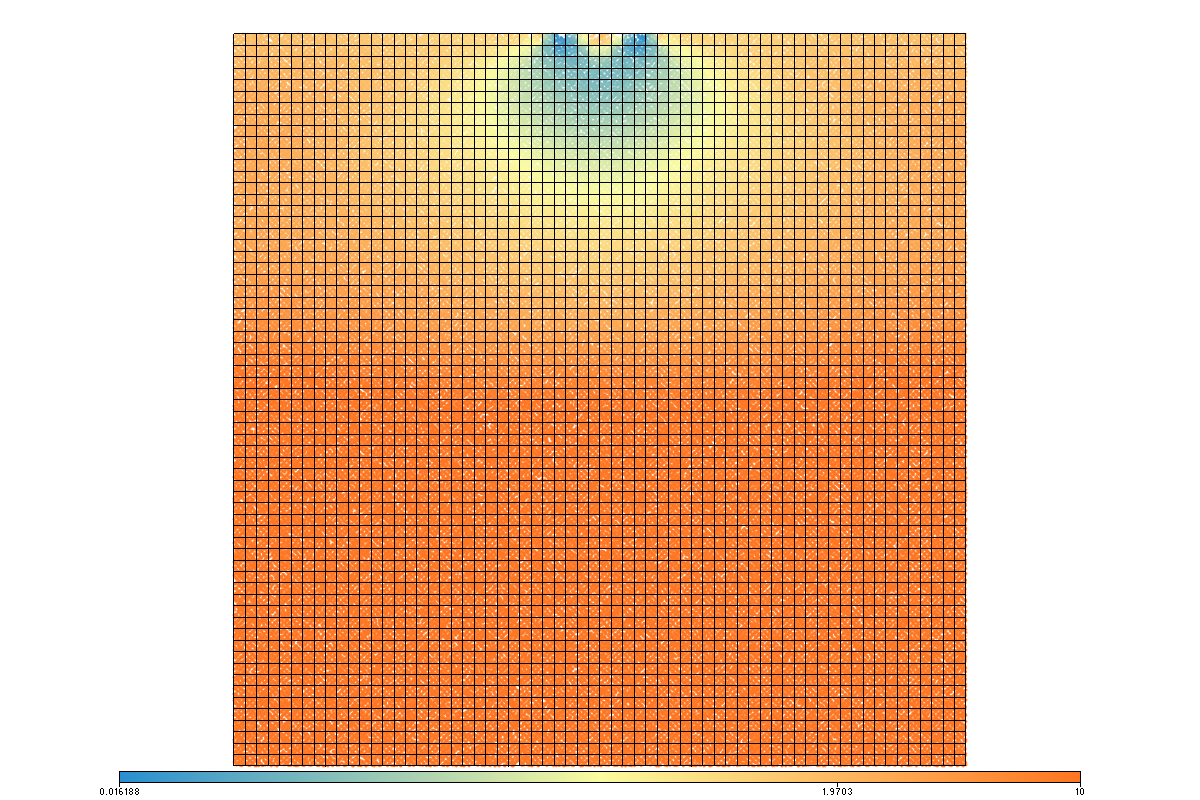

In [29]:
Fig = vis.Figure(figsize=(1200,800))
Fig.Points(Model.swarm, Model.viscosityField, fn_size=4.0, logScale=True)
Fig.Mesh(Model.mesh)
Fig.show()


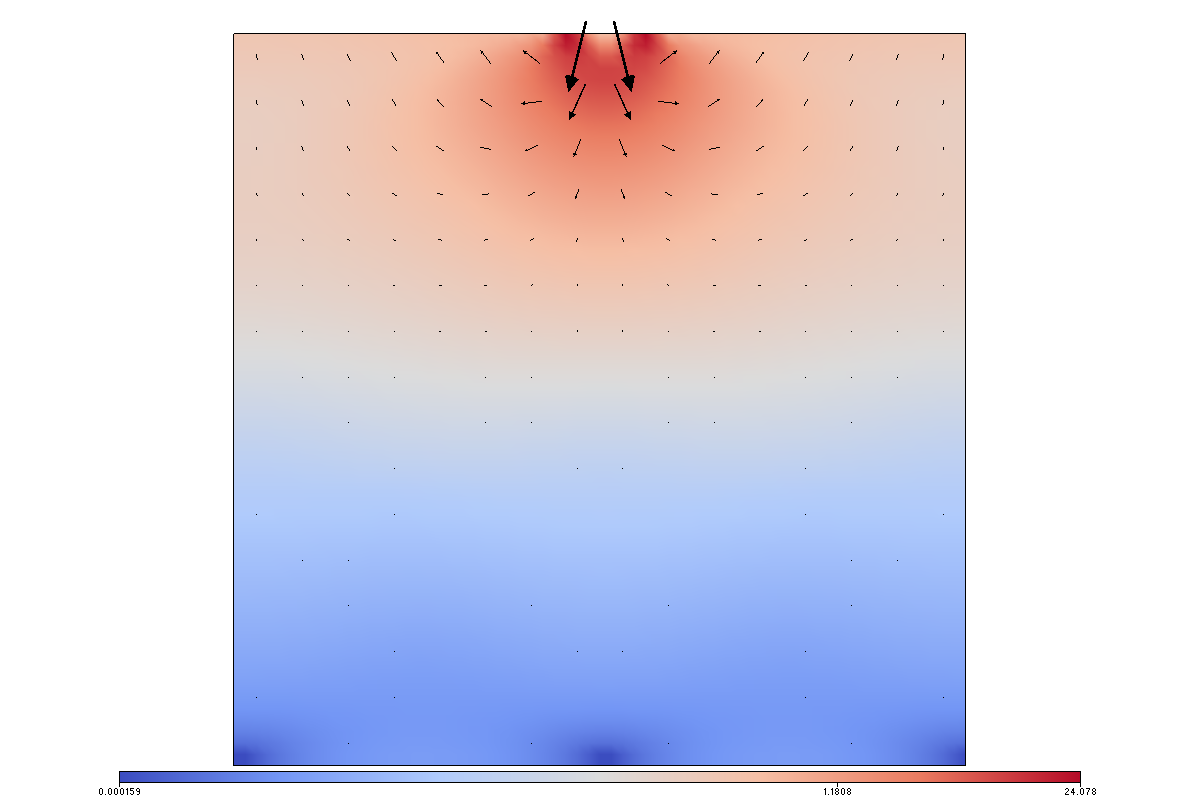

In [30]:
Fig = vis.Figure(figsize=(1200,800))
Fig.Surface(Model.mesh, Model.strainRateField, logScale=True, colours="coolwarm")
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()